In [171]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
dataset = pd.read_csv('pubg_data.csv')


In [173]:
dataset.shape

(500, 5)

In [174]:
dataset.head()

,Unnamed: 0,longestKill,matchDuration,rankPoints,walkDistance
0,0,0.00,1884,1500,588.0
1,1,361.90,1811,1503,2017.0
2,2,0.00,1793,1565,787.8
3,3,0.00,1834,1465,1812.0
4,4,60.06,1326,1480,2963.0


In [175]:
list = ['Unnamed: 0']
x = dataset.drop(list,axis = 1 )               #droping the following coloumn shown in list
x.head()


,longestKill,matchDuration,rankPoints,walkDistance
0,0.00,1884,1500,588.0
1,361.90,1811,1503,2017.0
2,0.00,1793,1565,787.8
3,0.00,1834,1465,1812.0
4,60.06,1326,1480,2963.0


In [176]:
#scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

In [177]:
#dimensionlity reduction
from sklearn.decomposition import PCA


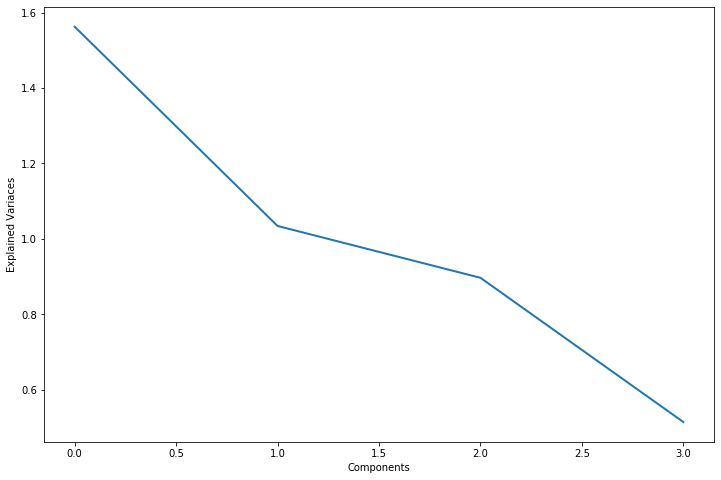

In [178]:
pca=PCA()
pca.fit(x)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()


In [179]:
pca=PCA(2) # fitting it on the n_component which we got from deciding the variance
pca.fit(x)
x_pca = pca.transform(x)
pca.n_components_

2

In [180]:
pca.n_components_

2

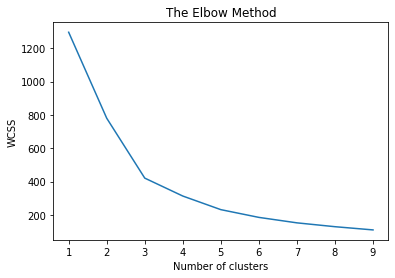

In [181]:
#deciding the value of Kmeans cluster
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [182]:
#Kmeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_pca)


In [184]:
#Five and Six both are good,but in six it is easy to differentiate

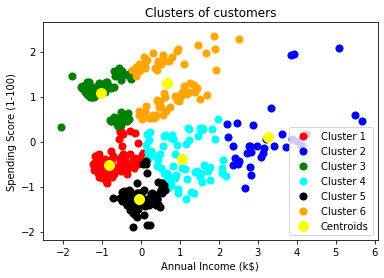

In [188]:
plt.scatter(x_pca[y_kmeans == 0, 0], x_pca[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x_pca[y_kmeans == 1, 0], x_pca[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x_pca[y_kmeans == 2, 0], x_pca[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(x_pca[y_kmeans == 3, 0], x_pca[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(x_pca[y_kmeans == 4, 0], x_pca[y_kmeans == 4, 1], s = 50, c = 'black', label = 'Cluster 5')
plt.scatter(x_pca[y_kmeans == 5, 0], x_pca[y_kmeans == 5, 1], s = 50, c = 'orange', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()